# Experiment 7
## Demonstration of clustering on dataset of your choice using DBSCAN algorithm in Python.


**DBSCAN (Density-Based Spatial Clustering of Applications with Noise):**

- **Objective**: Identify clusters of data points based on the density of points in the feature space, while also detecting noise or outliers.

- **Algorithm**:
  1. **Core Point**: A data point is considered a core point if it has at least 'minPts' data points within a distance 'epsilon' of it.
  2. **Border Point**: A data point is considered a border point if it is within 'epsilon' distance of a core point but does not have 'minPts' data points within 'epsilon' distance of it.
  3. **Noise Point**: A data point that is neither a core nor a border point is considered a noise point.

- **Formula** (Distance Metric):
  - The distance between a data point 'x' and a cluster center 'c' is calculated as:
    - ` d(p, q) = sqrt(sum_{i=1}^{n} (p_i - q_i)^2) `
     <br> where:
    - `(d(p, q))` is the distance between points 'p' and 'q'.
    - `(p_i)` and `(q_i)` are the coordinates of 'p' and 'q' in the 'i'-th dimension.
    - 'n' is the number of dimensions.

- **Parameter Setting**: DBSCAN requires setting two key parameters - 'epsilon' and 'minPts' - which control the size and density of the clusters.

- **Clustering Process**:
  1. Start with an arbitrary data point.
  2. If it's a core point, expand the cluster by adding all reachable points (core or border points) to the cluster.
  3. Continue this process until no more points can be added to the cluster.
  4. Repeat the process with unvisited points until all data points are assigned to clusters or marked as noise.

- **Applications**: DBSCAN is used in various fields, such as spatial data analysis, anomaly detection, and image segmentation.

- **Strengths**:
  - Can find clusters of arbitrary shape.
  - Robust to outliers and noise.
  - Doesn't require specifying the number of clusters in advance.

- **Limitations**:
  - Sensitive to the choice of parameters 'epsilon' and 'minPts'.
  - Struggles with clusters of varying densities.
  - Computationally intensive for large datasets.

- **Variants**: Several variants of DBSCAN exist, including OPTICS (Ordering Points To Identify the Clustering Structure) and HDBSCAN (Hierarchical DBSCAN), which provide enhancements to the original algorithm.

In [3]:
# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Apply PCA to reduce the dataset to 2 dimensions for visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_reduced)

## Visualizing Dataset

<ipython-input-4-aaff44287e60>:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_reduced[dbscan_labels == label][:, 0], X_reduced[dbscan_labels == label][:, 1], s=20, c=colors[i], label=f'Cluster {i + 1}')


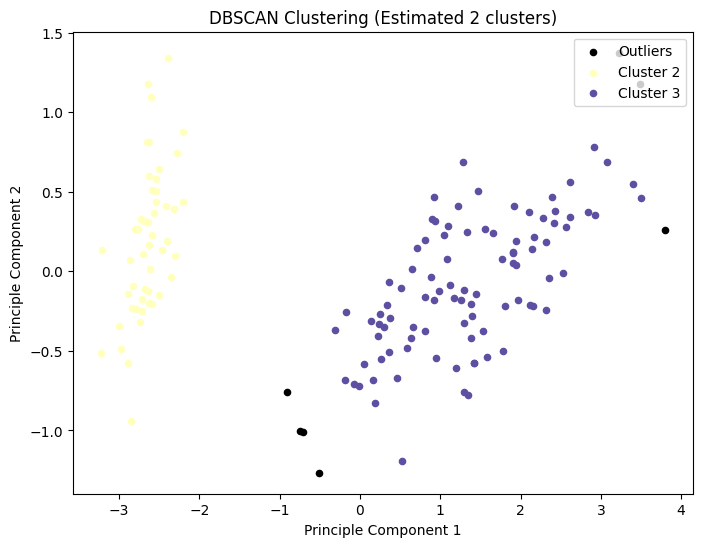

In [4]:
# Visualize the clustering result
unique_labels = np.unique(dbscan_labels)
n_clusters = len(unique_labels) - (1 if -1 in dbscan_labels else 0)

plt.figure(figsize=(8, 6))

# Create an array of colors for plotting data points
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, n_clusters + 1)]

for i, label in enumerate(unique_labels):
    if label == -1:
        # Outliers are labeled as -1, plot them in black
        plt.scatter(X_reduced[dbscan_labels == label][:, 0], X_reduced[dbscan_labels == label][:, 1], s=20, c='k', label='Outliers')
    else:
        plt.scatter(X_reduced[dbscan_labels == label][:, 0], X_reduced[dbscan_labels == label][:, 1], s=20, c=colors[i], label=f'Cluster {i + 1}')

plt.title(f'DBSCAN Clustering (Estimated {n_clusters} clusters)')
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.legend(loc='upper right')
plt.show()